In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score, recall_score
import seaborn as sns

In [23]:
# Step 2: Import the dataset
df = pd.read_csv("Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [24]:
# Step 4: Data Preprocessing
# Convert Categorical to Numerical Values if applicable
if df.select_dtypes(include=['object']).shape[1] > 0:
    df = pd.get_dummies(df, drop_first=True)

In [25]:
# Check for Null Values
df.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
Gender_Male        0
dtype: int64

In [26]:
# Covariance Matrix to select the most promising features
df.cov()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
User ID,5.134915e+09,-541.682870,1.737143e+08,244.836284,-905.617719
Age,-5.416829e+02,109.890702,5.548738e+04,3.131165,-0.386917
EstimatedSalary,1.737143e+08,55487.380952,1.162603e+09,5924.367168,-1031.403509
Purchased,2.448363e+02,3.131165,5.924367e+03,0.230269,-0.010201
Gender_Male,-9.056177e+02,-0.386917,-1.031404e+03,-0.010201,0.250526


In [27]:
# Divide the dataset into Independent(X) and Dependent(Y) variables
X = df.drop(columns=['Purchased'])  # Assuming 'Purchased' is the target variable
Y = df['Purchased']

# Split the dataset into training and testing datasets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
# Scale the Features if necessary
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [29]:
# Step 5: Use Logistic Regression to create the model
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [30]:
# Step 6: Predict y_pred for train and test datasets
y_pred_train = logreg.predict(xtrain)
y_pred_test = logreg.predict(xtest)


In [31]:
# Step 7: Evaluate the performance of the model
train_accuracy = accuracy_score(ytrain, y_pred_train)
test_accuracy = accuracy_score(ytest, y_pred_test)

In [32]:
# Step 8: Calculate required evaluation parameters
precision = precision_score(ytest, y_pred_test)
recall = recall_score(ytest, y_pred_test)
cm = confusion_matrix(ytest, y_pred_test)


In [33]:
# Display evaluation metrics
print(f"\nTrain Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:\n", cm)


Train Accuracy: 0.82
Test Accuracy: 0.89
Precision: 0.91
Recall: 0.75
Confusion Matrix:
 [[50  2]
 [ 7 21]]


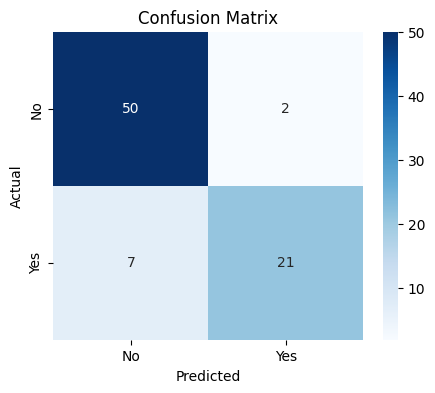

In [34]:
# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


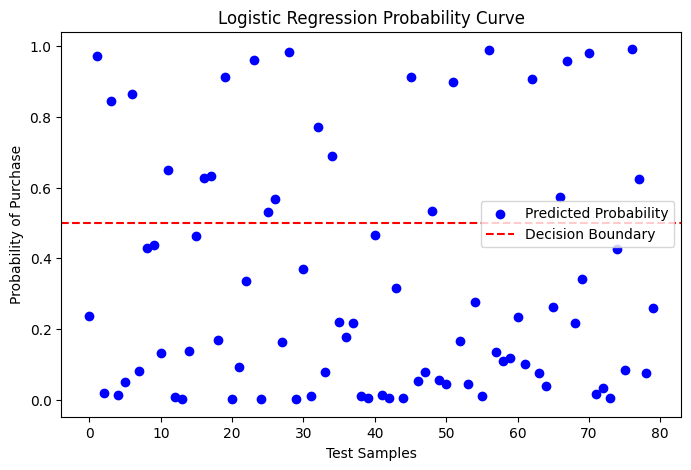

In [37]:

# Plot Logistic Regression Probability Curve
probabilities = logreg.predict_proba(xtest)[:, 1]
plt.figure(figsize=(8, 5))
plt.scatter(range(len(ytest)), probabilities, color='blue', label='Predicted Probability')
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel("Test Samples")
plt.ylabel("Probability of Purchase")
plt.title("Logistic Regression Probability Curve")
plt.legend()
plt.show()